<img src="udc1.png" alt="UDC"/>


# Notebook pour le traitement et préséléction d'images(déchets). 

In [1]:
#import outilsg

In [2]:
#import matplotlib.pyplot as plt
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import tensorflow as tf
#import numpy as np

In [12]:
#import load 
import outils

In [ ]:
#from tensorflow.keras import layers, models, regularizers
#from tensorflow.keras import Model

In [ ]:
#X_train, y_train, X_test, y_test = load.load_datagans()

In [ ]:
#X_train.shape

In [ ]:
#plt.figure(figsize=(18,9))
#for i in range(1,11):
#    plt.subplot(4,5,i)
#    plt.imshow(X_train[i])
#    plt.title(y_train[i])
#    plt.tight_layout()
#plt.show()

In [ ]:
latent_dim = 128
BATCH_SIZE = 32
EPOCHS = 100
BUFFER_SIZE = 10000  

In [ ]:
def preprocess_data(data):
    data = (data.astype("float32") / 127.5) - 1  # Normalisation [-1,1]
    return tf.data.Dataset.from_tensor_slices(data).shuffle(1000).batch(BATCH_SIZE)

In [ ]:
#strategy = tf.distribute.MirroredStrategy()
#print('DEVICES AVAILABLE: {}'.format(strategy.num_replicas_in_sync))

In [ ]:
#discriminator = outilsg.discriminator()
#generator = outilsg.generator() 
#generator.summary()
#discriminator.summary()

In [ ]:
#random_noise = tf.random.normal([1, 128])  # Un vecteur latent aléatoire
#fake_image = generator(random_noise)
#print(f"Shape de l'image générée : {fake_image.shape}")
#plt.imshow((fake_image[0]+1)/2)

In [ ]:
#dataset = preprocess_data(X_train)

In [ ]:
#for batch in dataset.take(1):
#    print("Shape du batch :", batch.shape)  # Debugging


In [ ]:
# ========================== Entraînement avec distribution multi-GPU ==========================

#with strategy.scope():
    # Déclaration du modèle GAN dans le scope pour multi-GPU
#gan = outilsg.GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
#gan.compile(
    
#    disc_opt=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5), 
#    gen_opt=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
#   loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE))


# ========================== Entraînement du modèle ==========================
#print("Début de l'entraînement du GAN...")
#history = gan.fit(
 #   dataset.map(lambda x: (x, tf.ones((tf.shape(x)[0], 1)))), 
#    epochs=EPOCHS,
 #   steps_per_epoch=len(dataset),
#    callbacks=[outilsg.GAN_Callback(num_images=4, latent_dim=latent_dim)]
#)

# ========================== Sauvegarde finale du modèle ==========================
#gan.generator.save(f'generator_final.keras')
#gan.discriminator.save(f'discriminator_final.keras')
#gan.save(f'gan_model_final.keras')  # Sauvegarde complète du modèle GAN
#print("Entraînement terminé. Modèle sauvegardé !") 

In [21]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
def plot_result(historique):
    #acc = historique.history['accuracy']
    gen_loss = historique.history['gen_loss']
    dis_loss = historique.history['disc_loss']
    #val_loss = historique.history['val_loss']

    epochs = range(len( gen_loss))
    fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(16,6))
    ax[0].plot(epochs, gen_loss, 'b', label='Gen loss')
    ax[0].plot(epochs, dis_loss, 'r', label='Disc loss')
    ax[0].set_title("Accuracy: Train and Test")
    ax[0].legend(loc=0)
   
    ax[1].plot(epochs, gen_loss, 'r', label='Test loss')
    ax[1].legend(loc=0)
    ax[1].set_title("Loss : Train and Test")
    #plt.savefig("appe.png")
    plt.show()

In [ ]:
#plot_result(history)

In [19]:
from tensorflow.keras.models import load_model
import numpy as np

In [9]:
path = "classification3.keras"

In [13]:
model = load_model('gen_epoch_0060.keras')
disc = load_model('disc_epoch_0060.keras')
classificateur,list_name  = outils.load_modele(path_model=path)

In [ ]:
random_noise = tf.random.normal([1, 100])  # Un vecteur latent aléatoire
fake_image = model(random_noise)
print(f" Shape de l'image générée : {fake_image.shape}")
plt.imshow((fake_image[0] + 1)/2)

In [ ]:
real_image = np.expand_dims( X_train[45],axis=0)

In [ ]:
real_image.shape

In [50]:
image_path = r"C:/Users/Moi/Pictures/logo1.png"

In [ ]:
real, img = outils.prepare_image(img_path=image_path,target_size=225)

In [15]:
def prepare_image(img_path, target_size):
    img = image.load_img(img_path, target_size=(target_size,target_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    return img_array, img

In [62]:
def predict(img_path, discriminateur,classificateur, target_size=225, list_name = None):
    img_array, img= prepare_image(img_path , target_size)
    est_connue = discriminateur.predict(img_array)
    if est_connue[0][0] >=0.01:
        predict_proba = classificateur.predict(img_array)
        y_pred = np.argmax(predict_proba, axis=1)
        result = np.max(predict_proba[0]*100)
        plt.imshow(img)
        plt.title(f"{list_name[y_pred[0]]} avec une précision de {result:.2f}%")
    else:
        result = est_connue[0][0]*100
        plt.imshow(img)
        plt.title(f"Classe inconnue {result:.2f}%")
    plt.savefig('status')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


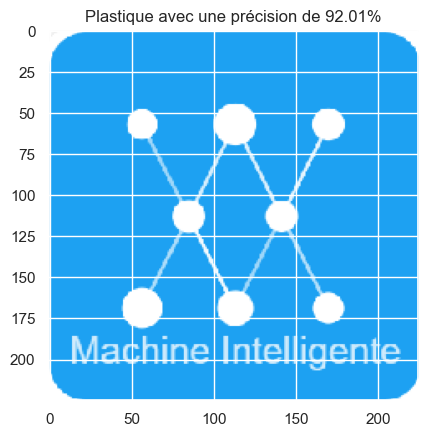

In [63]:
predict(img_path = image_path, classificateur = classificateur, discriminateur = disc, list_name = list_name)

In [ ]:
#plt.imshow(img)

In [ ]:
#plt.imshow(X_train[7]/255)

In [ ]:
import tensorflow as tf

In [ ]:
generator1 = generator()
random_noise = tf.random.normal([1, 100])  # Un vecteur latent aléatoire
fake_image = generator1(random_noise)
print(f"Shape de l'image générée : {fake_image.shape}")
plt.imshow((fake_image[0]+1)/2)